# HR Diagram from Class Spectra

Start with the settings that make for easy-to-read plots.

In [2]:
#import packages that we'll use in this notebook.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#this 'magic' matplotlib command tells iPython to show any figures in this notebook, 
#rather than a separate window or saving them in separate files.
%matplotlib inline

#These commands help python remember how to format my figures so that they look nice
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

Read in list of stars and parallax values (remembering that parallaxes are in units of milliarcseconds)

In [25]:
Stars, Parallaxes = np.loadtxt('StarsAndParallaxes.tbl', usecols=range(2), skiprows=1, unpack=True, 
                               dtype={'names': ('Star', 'Parallax'),'formats': (np.dtype('a8'), np.float)})

create lists that we can store each star's temperatures and luminosity in

In [34]:
n_stars = len(Stars)
temperature = np.zeros(n_stars)
luminosity = np.zeros(n_stars)

Use a FOR loop to read in each of the stars in the list, plot their spectra, calculate their temperatures and luminosities, save them in the arrays we created, and also print them to the screen

In [66]:
#print column headers for the info that will print out in this notebook as the loop below completes
print('{0:8s} {1:8s} {2:5s} {3:5s}'.format('Star', 'Parallax', 'Temp.', 'Lum.'))

#open a loop that will make a plot and perform our calculations for each of our stars
for x in range(0,n_stars-1):
    Wavelength, Flux = np.loadtxt('Stellar_Spectra/'+Stars[x].decode('UTF-8')+'.tbl', 
                                  usecols=range(2), skiprows=3, unpack=True)

    #make a plot of this star's spectrum and save it to a png file.
    plt.clf()
    plt.loglog(Wavelength,Flux,linewidth = 2)
    plt.xlim(0.8*np.min(Wavelength),1.2*np.max(Wavelength))
    plt.ylim(0.8*np.min(Flux),np.max(Flux)*1.2)
    xlabel = plt.xlabel('Wavelength ($\mu$m)') 
    ylabel = plt.ylabel('Flux density (ergs s${^-1}$ cm$^{-2}$ $\mu$m${^-1}$)');
    plt.title(Stars[x].decode('UTF-8'))
    plt.savefig('Stellar_Spectra/'+Stars[x].decode('UTF-8')+'.png') 
    plt.close()

    #find the wavelength of maximum flux density in the solar spectrum
    lambda_max = np.argmax(Flux)
    
    #calculate the star's temperature using Wein's Law
    temperature[x] = 2900 / Wavelength[lambda_max]
 
    #use trapezoidal integration to integrate the spectrum to calculated the bolometric flux we detect here at Earth
    bolometric_flux = np.trapz(Flux, Wavelength)
    
    #calculate the star's distance (in centimeters) from its parallax (which must be converted from *milli*arcseconds)
    cm_per_parsec = 3.086e18
    distance = cm_per_parsec*1./(Parallaxes[x]*1e-3)
    
    #calculate the star's luminosity as L = 4 pi d^2 bolometric_flux 
    #but scale to solar luminosities by dividing by the Sun's luminosity
    pi = 3.1415
    solar_luminosity = 3.826e33
    
    luminosity[x] = 4 * pi * distance**2 * bolometric_flux / solar_luminosity
     
    print('{0:8s} {1:5.2f} {2:5.0f} {3:5.3f}'.format(Stars[x].decode('UTF-8'),Parallaxes[x], temperature[x], luminosity[x]), sep = "   ")

Star     Parallax Temp. Lum. 
HD089025 12.56  7214 216.934
HD113139 40.06  7183 8.003
HD087822 15.80  6885 10.445
HD124850 44.97  6964 8.447
HD126660 68.82  6015 3.882
HD165908 63.88  6425 2.201
HD039949  0.36  4775 13868.516
HD042454  3.20  4965 244.873
HD076151 57.52  6015 1.045
HD122563  3.76  4671 263.411
HD135722 27.94  4778 58.612
HD101501 104.04  6047 0.604
HD075732 81.03  5460 0.577
HD164349  4.97  4964 662.450
HD100006 10.03  4965 60.155
HD145675 55.11  6048 0.656
HD137759 31.92  4965 52.916
HD039801  7.63  3275 41455.346
HD018191  8.08  2776 1636.492
HD147394 10.37  7516 218.721
HD046223  0.57  9043 27285.620
HD164136  4.10  7182 1188.633
GJ105A   139.27  4978 0.265
GJ15A    278.76  3142 0.022
GJ205    176.77  3076 0.061
GJ338A   172.08  3825 0.061
GJ338B   156.45  3825 0.071
GJ380    205.21  3817 0.107
GJ411    392.64  3523 0.020
GJ412A   206.27  3282 0.021
GJ526    185.50  3806 0.035
GJ570A   171.20  4795 0.207
GJ581    158.79  3105 0.011
GJ687    220.84  3151 0.021
GJ699  

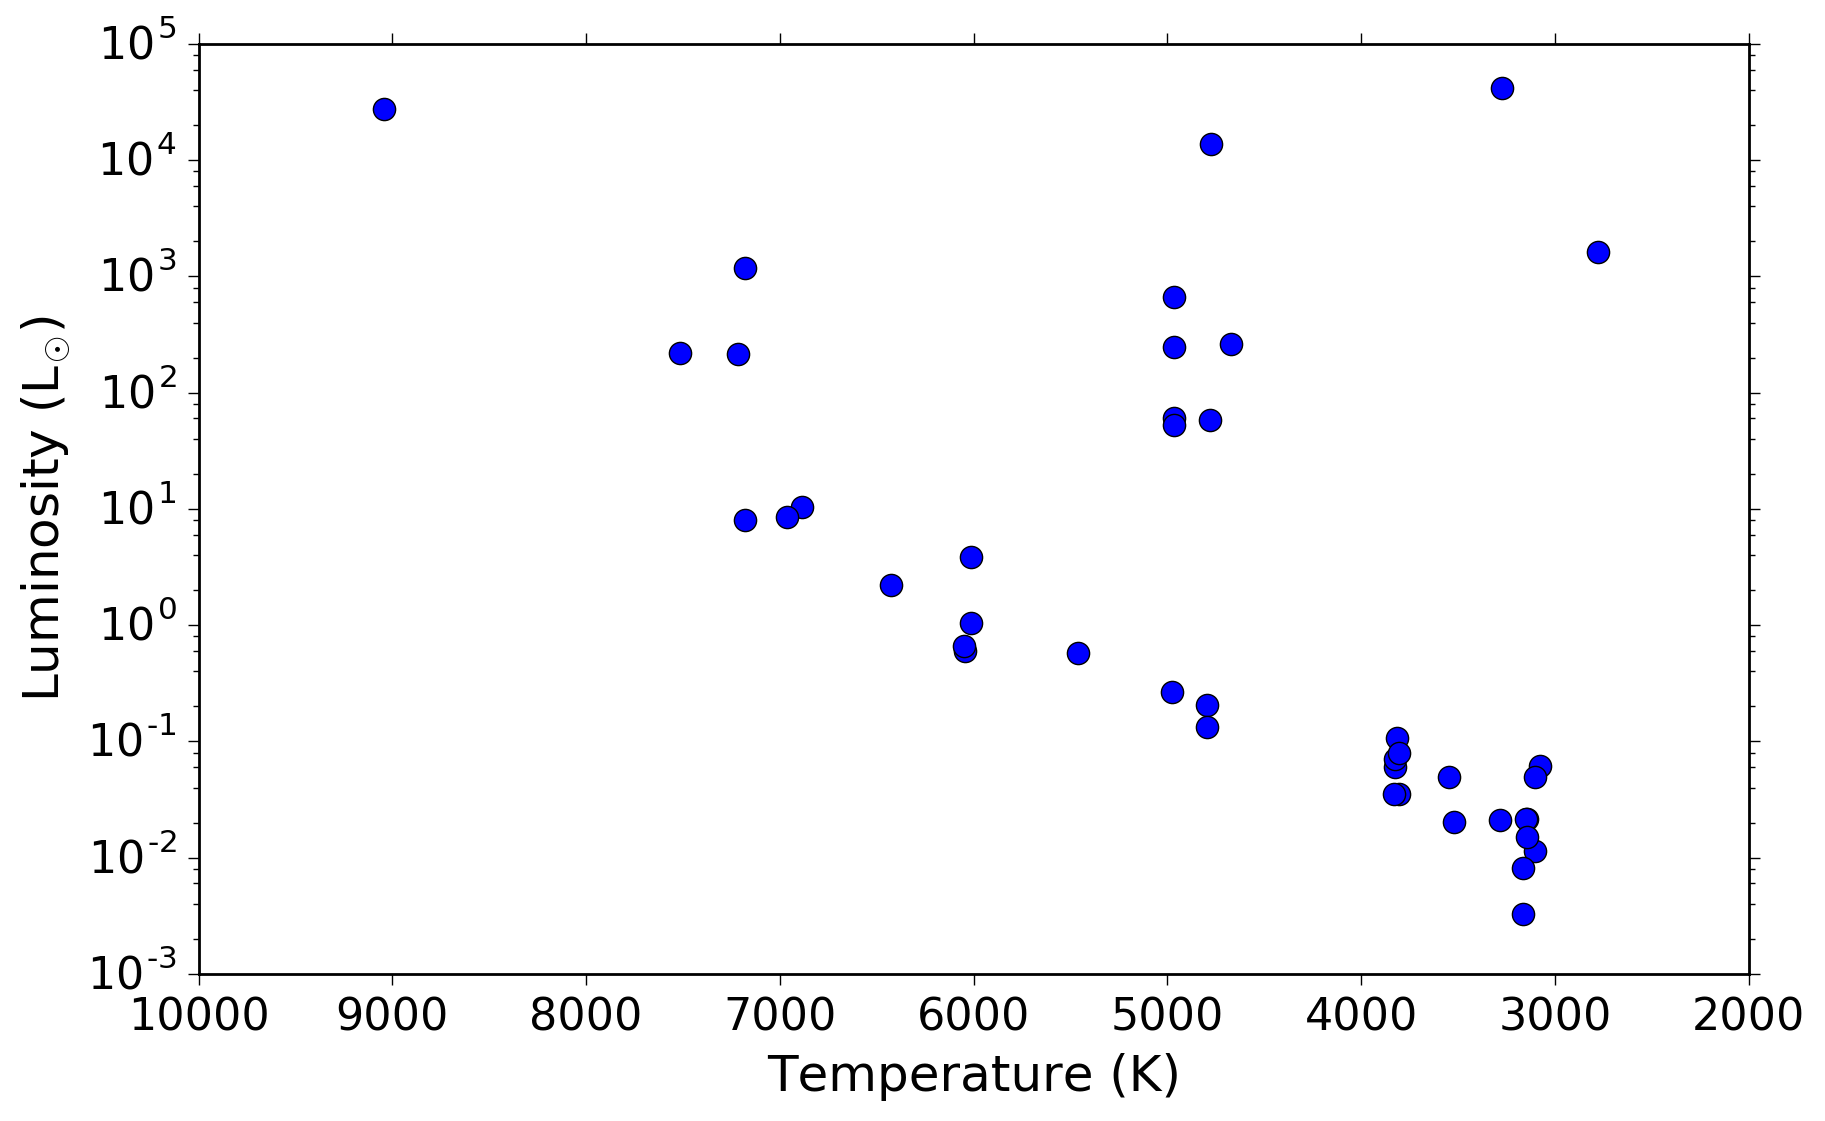

In [65]:
plt.clf()
plt.semilogy(temperature,luminosity, marker = 'o', linestyle = 'none')
plt.xlim(10000,2000)
xlabel = plt.xlabel('Temperature (K)') 
ylabel = plt.ylabel('Luminosity (L$_{\odot}$)');
plt.savefig('HRdiagram.png') 